In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2025-06-28 02:03:19.759738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751076199.979422      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751076200.050616      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# spin 0.5

In [ ]:
# Load dataset
df = pd.read_csv("")  # Add "Pure states training for 0.5" File Path
X = df.drop(columns=["N"])
y = df["N"]

In [5]:
# Explor The Data
print("Data shape:",df.shape)
print("X shape:",X.shape)
print("y shape:",y.shape)

Data shape: (9999, 5)
X shape: (9999, 4)
y shape: (9999,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features (for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build and train Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-28 02:03:58.215773: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1220 - val_loss: 0.0065
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 7.2917e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0489e-04 - val_loss: 4.3006e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0067e-04 - val_loss: 2.7665e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3483e-04 - val_loss: 2.0438e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0124e-04 - val_loss: 1.6742e-04
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3098e-04 - val_loss: 1.3861e-04
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1857e-04 - val_loss: 1.3020e-04
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0531e-04 - val_loss: 1.1074e-04
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2473e-05 - val_loss: 1.0406e-04
Epoch 1

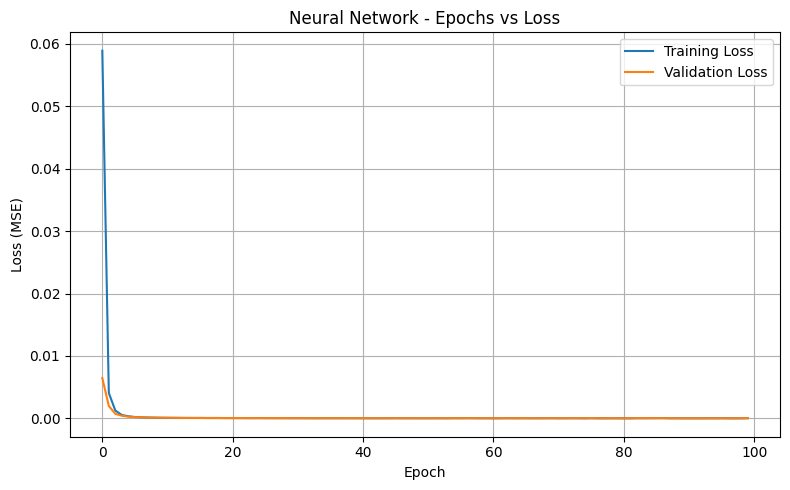

In [9]:
# Plot training and validation loss from the history
plt.figure(figsize=(8, 5))
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network - Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Train Extra Trees model
et_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Predict with both models
nn_pred = nn_model.predict(X_test_scaled).flatten()
xgb_pred = xgb_model.predict(X_test)
et_pred = et_model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R²: {r2:.6f}\n")

evaluate_model(y_test, nn_pred, "Neural Network")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, et_pred, "Extra Trees")

Neural Network Performance:
  MSE: 0.0000
  MAE: 0.0029
  R²: 0.9998

XGBoost Performance:
  MSE: 0.0014
  MAE: 0.0209
  R²: 0.9876

Extra Trees Performance:
  MSE: 0.0007
  MAE: 0.0132
  R²: 0.9939



In [14]:
# Integrating predictions as inputs to the meta-learner
meta_X = np.column_stack((nn_pred, xgb_pred, et_pred))
meta_y = y_test

# Tain the meta-learner (GradientBoostingRegressor)
meta_learner = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_learner.fit(meta_X, meta_y)

# Predict the final results
final_preds = meta_learner.predict(meta_X)

# Calculate the metrics (R^2, MSE, MAE)
r2 = r2_score(meta_y, final_preds)
mse = mean_squared_error(meta_y, final_preds)
mae = mean_absolute_error(meta_y, final_preds)

# Print metrics results
print(f"R^2 Score of Stacking Model: {r2}")
print(f"MSE of Stacking Model: {mse}")
print(f"MAE of Stacking Model: {mae}")

R^2 Score of Stacking Model: 0.9999267509078851
MSE of Stacking Model: 8.025656627927563e-06
MAE of Stacking Model: 0.001606351727909212


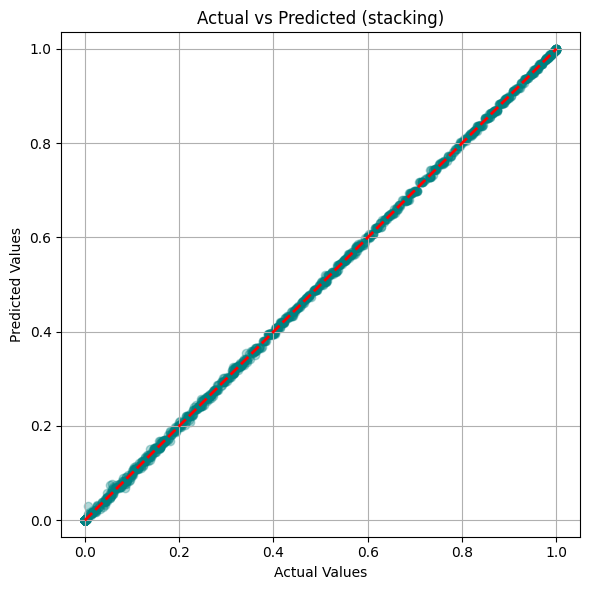

In [17]:
# After evaluation, plot Actual vs Predicted for ensemble with Stacking
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_preds, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (stacking)")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Spin 1

In [ ]:
# Load dataset
df = pd.read_csv("")  # Add "Pure states training for 1" File Path
X = df.drop(columns=["N"])
y = df["N"]

In [19]:
print("Data shape:",df.shape)
print("X shape:",X.shape)
print("y shape:",y.shape)

Data shape: (19999, 10)
X shape: (19999, 9)
y shape: (19999,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features (for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Build and train Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0387 - val_loss: 0.0050
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3367e-04 - val_loss: 0.0014
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0104e-04 - val_loss: 0.0012
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 

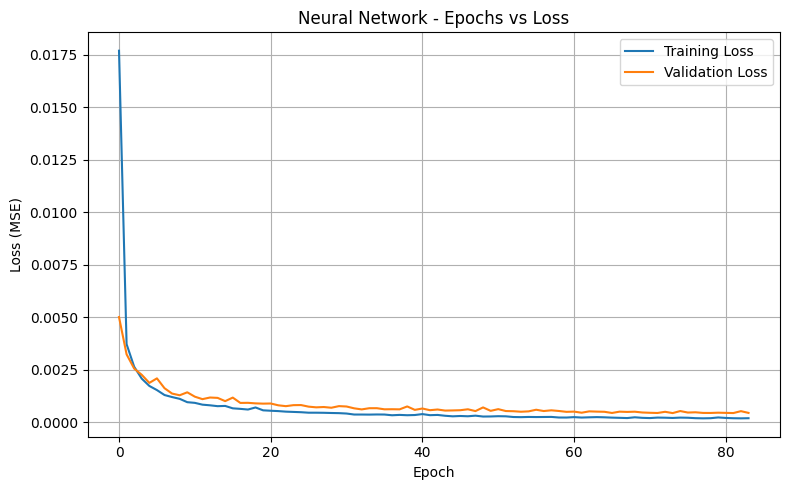

In [23]:
# Plot training and validation loss from the history
plt.figure(figsize=(8, 5))
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network - Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Train Extra Trees model
et_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Predict with both models
nn_pred = nn_model.predict(X_test_scaled).flatten()
xgb_pred = xgb_model.predict(X_test)
et_pred = et_model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R²: {r2:.6f}\n")

evaluate_model(y_test, nn_pred, "Neural Network")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, et_pred, "Extra Trees")

Neural Network Performance:
  MSE: 0.000444
  MAE: 0.015106
  R²: 0.991966

XGBoost Performance:
  MSE: 0.005042
  MAE: 0.053614
  R²: 0.908849

Extra Trees Performance:
  MSE: 0.005662
  MAE: 0.056917
  R²: 0.897637



In [28]:
# Integrating predictions as inputs to the meta-learner
meta_X = np.column_stack((nn_pred, xgb_pred, et_pred))
meta_y = y_test

# Tain the meta-learner (GradientBoostingRegressor)
meta_learner = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_learner.fit(meta_X, meta_y)

# Predict the final results
final_preds = meta_learner.predict(meta_X)

# Calculate the metrics (R^2, MSE, MAE)
r2 = r2_score(meta_y, final_preds)
mse = mean_squared_error(meta_y, final_preds)
mae = mean_absolute_error(meta_y, final_preds)

# Print metrics results
print(f"R^2 Score of Stacking Model: {r2}")
print(f"MSE of Stacking Model: {mse}")
print(f"MAE of Stacking Model: {mae}")

R^2 Score of Stacking Model: 0.993677168933967
MSE of Stacking Model: 0.00034972592708526885
MAE of Stacking Model: 0.012708472898087419


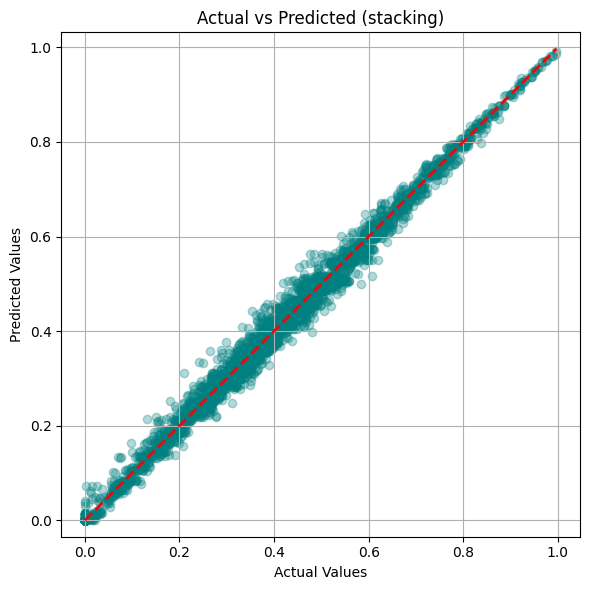

In [32]:
# Plot Actual vs Predicted for ensemble with Stacking
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_preds, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (stacking)")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Spin 5

In [ ]:
# Load dataset
df = pd.read_csv("")  # Add "Pure states training for 5" File Path
X = df.drop(columns=["N"])
y = df["N"]

In [34]:
print("Data shape:",df.shape)
print("X shape:",X.shape)
print("y shape:",y.shape)

Data shape: (99985, 26)
X shape: (99985, 25)
y shape: (99985,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features (for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build and train Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0310 - val_loss: 0.0050
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

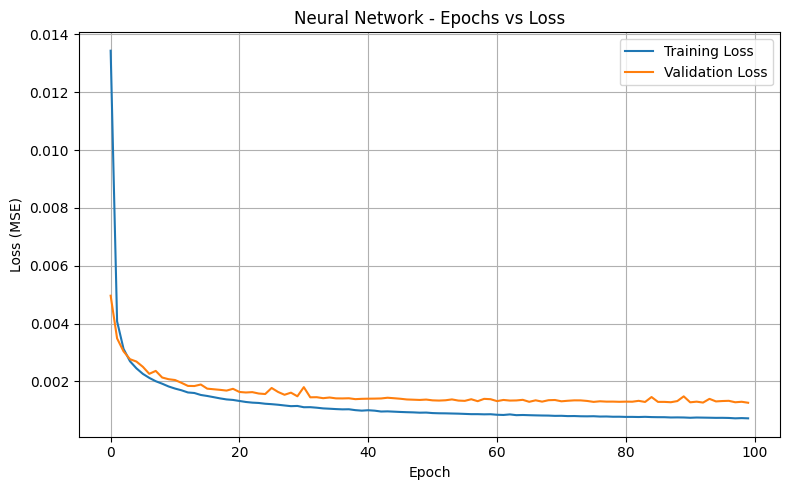

In [38]:
# Plot training and validation loss from the history
plt.figure(figsize=(8, 5))
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network - Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Train Extra Trees model
et_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Predict with both models
nn_pred = nn_model.predict(X_test_scaled).flatten()
xgb_pred = xgb_model.predict(X_test)
et_pred = et_model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}\n")

evaluate_model(y_test, nn_pred, "Neural Network")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, et_pred, "Extra Trees")

Neural Network Performance:
  MSE: 0.0013
  MAE: 0.0270
  R²: 0.9624

XGBoost Performance:
  MSE: 0.0051
  MAE: 0.0558
  R²: 0.8465

Extra Trees Performance:
  MSE: 0.0095
  MAE: 0.0782
  R²: 0.7154



In [43]:
# Integrating predictions as inputs to the meta-learner
meta_X = np.column_stack((nn_pred, xgb_pred, et_pred))
meta_y = y_test

# Tain the meta-learner (GradientBoostingRegressor)
meta_learner = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_learner.fit(meta_X, meta_y)

# Predict the final results
final_preds = meta_learner.predict(meta_X)

# Calculate the metrics (R^2, MSE, MAE)
r2 = r2_score(meta_y, final_preds)
mse = mean_squared_error(meta_y, final_preds)
mae = mean_absolute_error(meta_y, final_preds)

# Print metrics results
print(f"R^2 Score of Stacking Model: {r2}")
print(f"MSE of Stacking Model: {mse}")
print(f"MAE of Stacking Model: {mae}")

R^2 Score of Stacking Model: 0.9652609577600747
MSE of Stacking Model: 0.0011631923036363636
MAE of Stacking Model: 0.025685562747565793


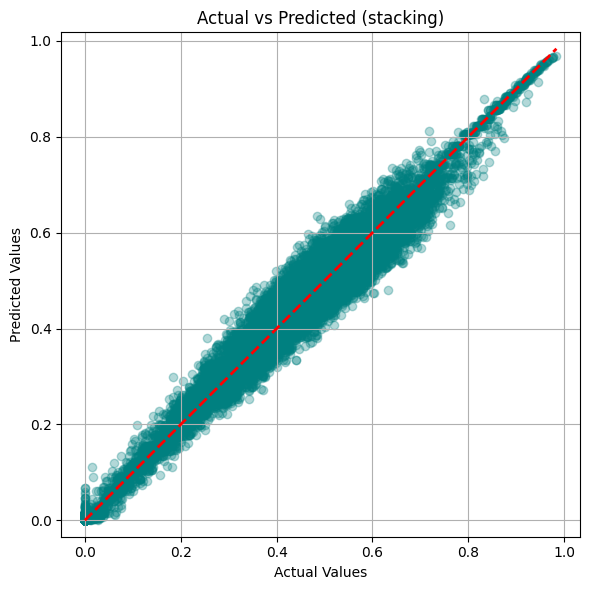

In [47]:
# Plot Actual vs Predicted for ensemble with Stacking
plt.figure(figsize=(6,6))
plt.scatter(y_test, final_preds, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (stacking)")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()